## Outlier removal function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
dic = {"roll":[-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13],"marks":[-13,-12,1,2,3,4,5,6,6,7,8,8,9,90,100]}
df = pd.DataFrame(dic)
df

,roll,marks
0,-1,-13
1,0,-12
2,1,1
3,2,2
4,3,3
5,4,4
6,5,5
7,6,6
8,7,6
9,8,7


In [3]:
def get_whiskers(col):
    q1 = np.quantile(col,0.25)
    q3 = np.quantile(col,0.75)
    iqr = q3-q1
    uw = q3 + 1.5*iqr
    lw = q1 - 1.5*iqr
    return uw,lw

def return_outliers_index(df,col):
    index_list = []
    uw,lw = get_whiskers(df[col])
    for m in df[col]:
        if m > uw:
            index = df.index[df[col] == m].tolist()[0]
            index_list.append(index)
        elif m < lw:
            index = df.index[df[col] == m].tolist()[0]
            index_list.append(index)
        else:
            pass
        
    return index_list

In [4]:
outliers_index = return_outliers_index(df,"marks")

In [5]:
outliers_index

[0, 1, 13, 14]

In [6]:
df.drop(outliers_index,inplace=True)

In [7]:
df

,roll,marks
2,1,1
3,2,2
4,3,3
5,4,4
6,5,5
7,6,6
8,7,6
9,8,7
10,9,8
11,10,8


In [8]:
cars = pd.read_csv("cars.csv")

In [9]:
cars.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


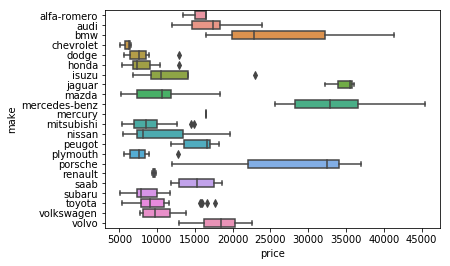

In [10]:
sns.boxplot(data=cars,x="price",y="make")
plt.show()

In [11]:
makes = cars["make"].unique().tolist()
makes

['alfa-romero',
 'audi',
 'bmw',
 'chevrolet',
 'dodge',
 'honda',
 'isuzu',
 'jaguar',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mitsubishi',
 'nissan',
 'peugot',
 'plymouth',
 'porsche',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

In [12]:
for m in makes:
    indexes = return_outliers_index(cars[cars["make"]==m],"price")
    print(indexes)
    cars.drop(indexes,inplace=True)

[]
[]
[]
[]
[29]
[41]
[45]
[]
[]
[]
[]
[83, 84]
[]
[]
[124]
[]
[]
[]
[]
[172, 178, 179, 180, 181]
[]
[]


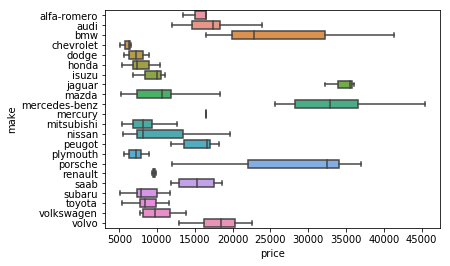

In [13]:
sns.boxplot(data=cars,x="price",y="make")
plt.show()